In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

from sklearn.cluster import *

In [12]:
df = pd.read_csv('./GOOGL_weekly_return_volatility.csv')
feature = df[['mean_return', 'volatility']].values
labelTrue = df.label

In [13]:
df

,Year,Week_Number,mean_return,volatility,label
0,2019,0,0.786333,4.007779,1
1,2019,1,-0.251200,0.782992,0
2,2019,2,0.802600,1.639555,1
3,2019,3,-0.119000,1.783558,0
4,2019,4,0.326400,2.111818,1
...,...,...,...,...,...
101,2020,48,0.418400,1.633047,1
102,2020,49,-0.540200,0.819065,0
103,2020,50,-0.551600,0.701441,0
104,2020,51,0.116250,0.631919,0


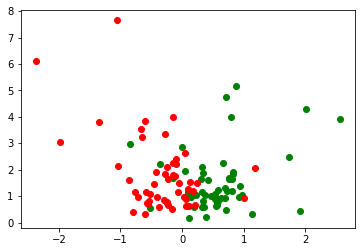

In [14]:
# plot data point
plt.scatter(x = df[df.label == 1].mean_return, y = df[df.label==1].volatility, color='green')
plt.scatter(x = df[df.label == 0].mean_return, y = df[df.label==0].volatility, color='red')


# Knee method

In [15]:
inList = []
kList = [i+1 for i in range(8)]
for k in kList:
    
    clf = KMeans(n_clusters=k, random_state=0)
    yPre = clf.fit_predict(feature)
    inList.append(clf.inertia_)


C:\Users\Lee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


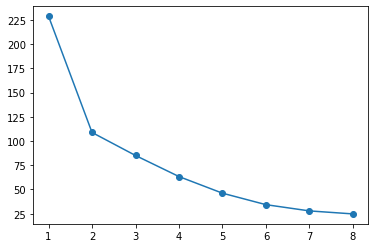

In [16]:
plt.plot(kList, inList,marker='o')

# Optimal K

In [18]:
k = 2
clf = KMeans(n_clusters=2, random_state=0)
yPre = clf.fit_predict(feature)
df['labelPredict'] = yPre

In [19]:
df

,Year,Week_Number,mean_return,volatility,label,labelPredict
0,2019,0,0.786333,4.007779,1,1
1,2019,1,-0.251200,0.782992,0,0
2,2019,2,0.802600,1.639555,1,0
3,2019,3,-0.119000,1.783558,0,0
4,2019,4,0.326400,2.111818,1,0
...,...,...,...,...,...,...
101,2020,48,0.418400,1.633047,1,0
102,2020,49,-0.540200,0.819065,0,0
103,2020,50,-0.551600,0.701441,0,0
104,2020,51,0.116250,0.631919,0,0


In [22]:
cluster1 = df[df.labelPredict == 0]
cluster2 = df[df.labelPredict == 1]

# cluster 1 
greenRate = sum(cluster1.label) / len(cluster1)
redRate = 1 - greenRate
print(greenRate, redRate)


# cluster 2 
greenRate = sum(cluster2.label) / len(cluster2)
redRate = 1 - greenRate
print(greenRate, redRate)

0.5333333333333333 0.4666666666666667
0.4375 0.5625
